In [1]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV
from sklearn import linear_model

In [2]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(X_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [5]:
reg = LinearRegression().fit(X_train, y_train)

In [6]:
reg.score(X_train, y_train)

0.7495400632086622

In [7]:
reg.coef_

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342])

In [8]:
reg.intercept_ 

22.39477120628105

In [9]:
x = np.c_[X_train, np.ones(X_train.shape[0])]
print(x.shape)

(354, 14)


In [10]:
def reg(X,y):
    reg = np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X), y))
    return reg

In [11]:
R = reg(x,y_train)
R

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342, 22.39477121])

In [12]:
def regress(X, α, β):
    y_chap = np.dot(α,np.transpose(X)) + β
    return y_chap

In [13]:
β = R[-1]
β

22.39477120628103

In [14]:
α = R[:-1]
α

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342])

In [15]:
Y_chap = regress(X_train, α, β)
erreur = sum((y_train-Y_chap)**2)
erreur

6888.726767720123

In [16]:
y_train.shape[0]

354

In [17]:
def ridge_regression(X, y , lambdaa):
    I_ = np.eye(X.shape[1])
    reg = np.dot(np.linalg.pinv(np.dot(np.transpose(X),X) + lambdaa*I_),np.dot(np.transpose(X), y))
    return reg

In [18]:
R_ = ridge_regression(x,y_train,1)
R_

array([-1.31009633,  1.49401402, -0.1802062 ,  0.41280683, -1.73584019,
        2.36756974,  0.30583892, -3.21078042,  2.54436578, -1.97852069,
       -1.74477602,  1.17951693, -3.86581417, 22.33102639])

In [19]:
β_ = R_[-1]
β_

22.33102638952233

In [20]:
α_ = R_[:-1]
α_

array([-1.31009633,  1.49401402, -0.1802062 ,  0.41280683, -1.73584019,
        2.36756974,  0.30583892, -3.21078042,  2.54436578, -1.97852069,
       -1.74477602,  1.17951693, -3.86581417])

In [59]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0.001, 1000, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None).reset_index()


In [22]:
ridge_reg.coef_

array([-0.38435433,  0.44187439, -0.45693531,  0.26826135, -0.36566109,
        1.07371529, -0.30620561, -0.03738011, -0.21810837, -0.42067111,
       -0.69094802,  0.4263989 , -1.08840083])

In [23]:
ridge_reg.intercept_

22.187073179125132

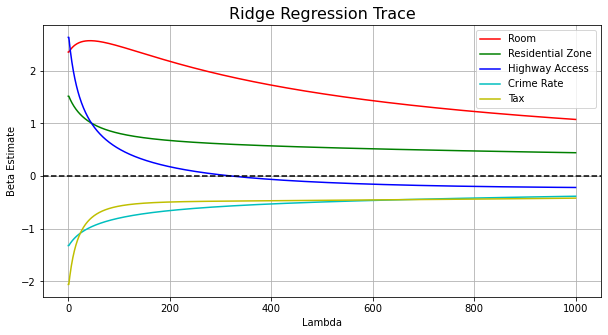

In [24]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

In [25]:
from sklearn.linear_model import RidgeCV
alphas = np.arange(0.001, 1000, 1)
model = RidgeCV(alphas).fit(X_train, y_train)
model.score(X_train, y_train)

0.7491876095302601

In [26]:
R_new = ridge_regression(x,y_train,0.7491876095302601)
R_new 

array([-1.31286582,  1.49912938, -0.17686952,  0.41252599, -1.74454884,
        2.36396994,  0.30895606, -3.22215788,  2.56588392, -1.99820048,
       -1.74735037,  1.17992892, -3.87109855, 22.34698481])

In [27]:
Y_chap = regress(X_train, R_new[:-1], R_new[-1])
erreur = sum((y_train-Y_chap)**2)
erreur

6889.92916947442

In [53]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

Lasso(alpha=0.5)

In [60]:
# initialize
lasso_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': reg.coef_})
lasso_train_pred = []
lasso_test_pred = []
for alpha in np.arange(0.001, 10, 1):
    # training
    reg = Lasso(alpha=alpha)
    reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = reg.coef_
    # prediction
    lasso_train_pred.append(reg.predict(X_train))
    lasso_test_pred.append(reg.predict(X_test))

# organize dataframe
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None).reset_index()


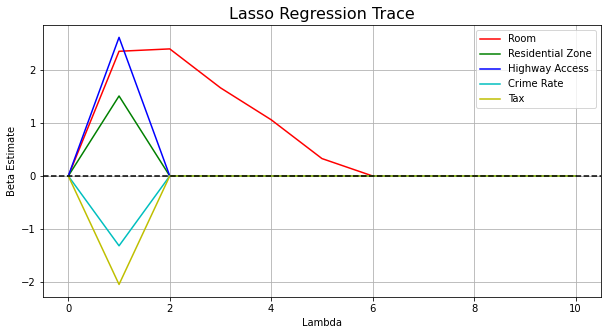

In [61]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

In [44]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

0.7495121696925291

In [45]:
reg = Lasso(alpha=0.7495121696925291)
reg.fit(X_train, y_train)
reg.coef_

array([-0.11271074,  0.        , -0.        ,  0.        , -0.        ,
        2.61470769, -0.        , -0.        , -0.        , -0.        ,
       -1.33835395,  0.68914086, -3.60498631])

In [46]:
Y_chap = regress(X_train, reg.coef_, reg.intercept_)
erreur = sum((y_train-Y_chap)**2)
erreur

8888.449801339913